Importing libraries where prophet is used to handel trends and seasonality . it is also can be done by "from statsmodels.tsa.stattools import adfuller"

In [ ]:
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# from google.colab import files
# uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


now reading the data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/time-series-forecasting-with-yahoo-stock-price")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/time-series-forecasting-with-yahoo-stock-price


In [ ]:
import os
print("Files in dataset:")
for file in os.listdir(path):
    print(file)


Files in dataset:
yahoo_stock.csv


In [ ]:

file_path = os.path.join(path, "yahoo_stock.csv")

df = pd.read_csv(file_path)
af = df
print("columns:")
print(df.columns.tolist())
print("Shape:", df.shape)
print("Size:", df.size)
print("info:")
df.info()

columns:
['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
Shape: (1825, 7)
Size: 12775
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


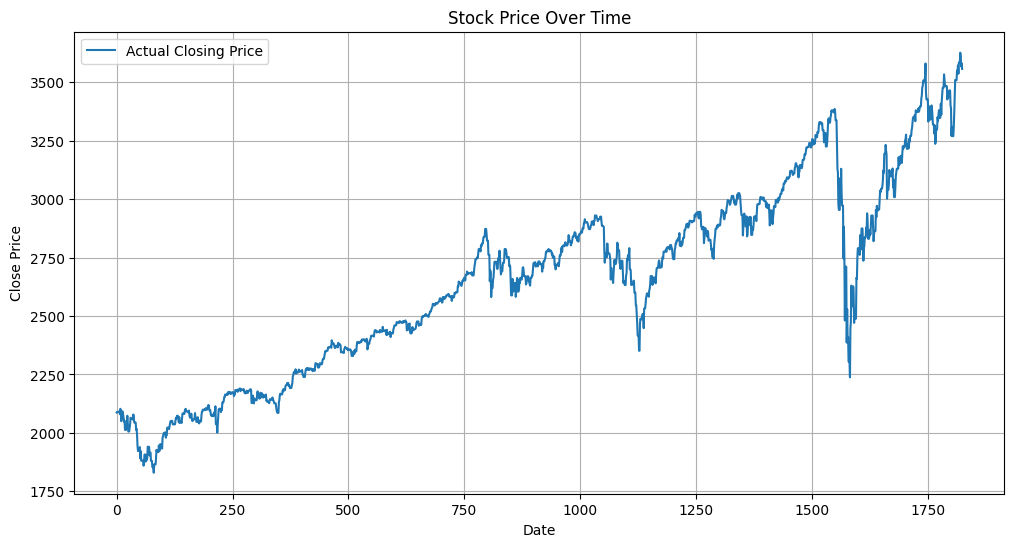

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual Closing Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index(['Date','Close'],inplace=True)
df.head()


,,High,Low,Open,Volume,Adj Close
Date,Close,,,,,
2015-11-23,2086.590088,2095.610107,2081.389893,2089.409912,3.587980e+09,2086.590088
2015-11-24,2089.139893,2094.120117,2070.290039,2084.419922,3.884930e+09,2089.139893
2015-11-25,2088.870117,2093.000000,2086.300049,2089.300049,2.852940e+09,2088.870117
2015-11-26,2088.870117,2093.000000,2086.300049,2089.300049,2.852940e+09,2088.870117
2015-11-27,2090.110107,2093.290039,2084.129883,2088.820068,1.466840e+09,2090.110107


In [ ]:
df.tail()

,,High,Low,Open,Volume,Adj Close
Date,Close,,,,,
2020-11-16,3626.909912,3628.510010,3600.159912,3600.159912,5.281980e+09,3626.909912
2020-11-17,3609.530029,3623.110107,3588.679932,3610.310059,4.799570e+09,3609.530029
2020-11-18,3567.790039,3619.090088,3567.330078,3612.090088,5.274450e+09,3567.790039
2020-11-19,3581.870117,3585.219971,3543.840088,3559.409912,4.347200e+09,3581.870117
2020-11-20,3557.540039,3581.229980,3556.850098,3579.310059,2.236662e+09,3557.540039


In [ ]:
data = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data.head()

print(df.columns)

Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
model =Prophet()
model.fit(data)


future=model.make_future_dataframe(periods=365)

forecast=model.predict(future)
future.tail()
# print(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvllqb2pw/ia_xc7og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvllqb2pw/qfmk2745.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3109', 'data', 'file=/tmp/tmpvllqb2pw/ia_xc7og.json', 'init=/tmp/tmpvllqb2pw/qfmk2745.json', 'output', 'file=/tmp/tmpvllqb2pw/prophet_model5ixey125/prophet_model-20250727125435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
2185,2021-11-16
2186,2021-11-17
2187,2021-11-18
2188,2021-11-19
2189,2021-11-20


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2185,2021-11-16,3705.632886,2874.643316,4921.944448,2757.179418,4744.418777,138.311336,138.311336,138.311336,0.494597,0.494597,0.494597,137.816739,137.816739,137.816739,0.0,0.0,0.0,3843.944222
2186,2021-11-17,3706.643467,2915.691913,4916.874629,2754.761735,4752.960582,141.785855,141.785855,141.785855,1.934874,1.934874,1.934874,139.850980,139.850980,139.850980,0.0,0.0,0.0,3848.429322
2187,2021-11-18,3707.654048,2862.305538,4934.656382,2747.114816,4758.404808,141.748726,141.748726,141.748726,0.116261,0.116261,0.116261,141.632466,141.632466,141.632466,0.0,0.0,0.0,3849.402774
2188,2021-11-19,3708.664629,2873.381018,4941.705343,2739.637870,4763.849034,143.677884,143.677884,143.677884,0.524439,0.524439,0.524439,143.153445,143.153445,143.153445,0.0,0.0,0.0,3852.342513
2189,2021-11-20,3709.675210,2854.916582,4911.364922,2733.723157,4768.373291,143.841673,143.841673,143.841673,-0.568183,-0.568183,-0.568183,144.409856,144.409856,144.409856,0.0,0.0,0.0,3853.516883


In [ ]:
print(data.columns)
print(df.columns)
print(forecast.columns)

Index(['ds', 'y'], dtype='object')
Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


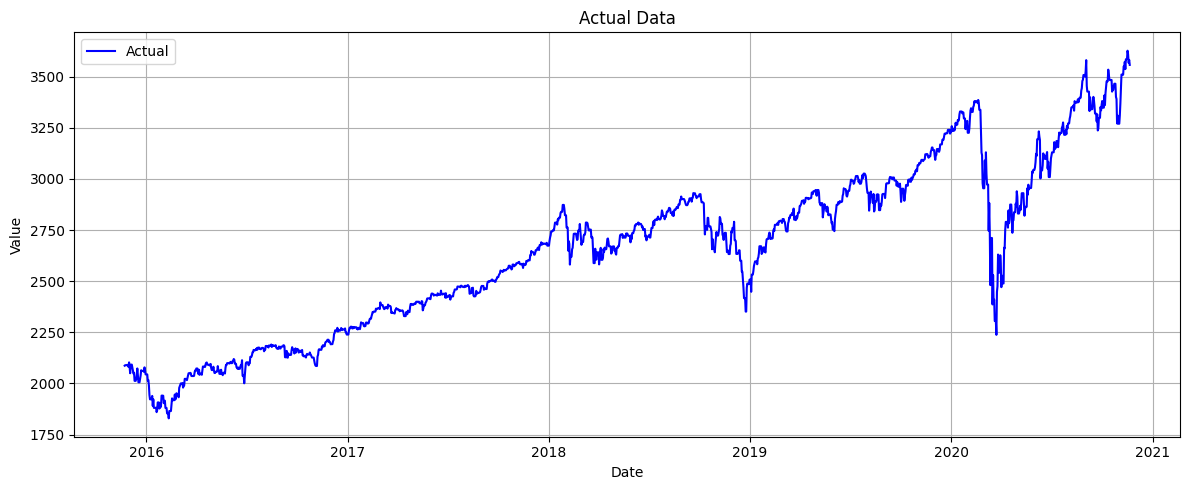

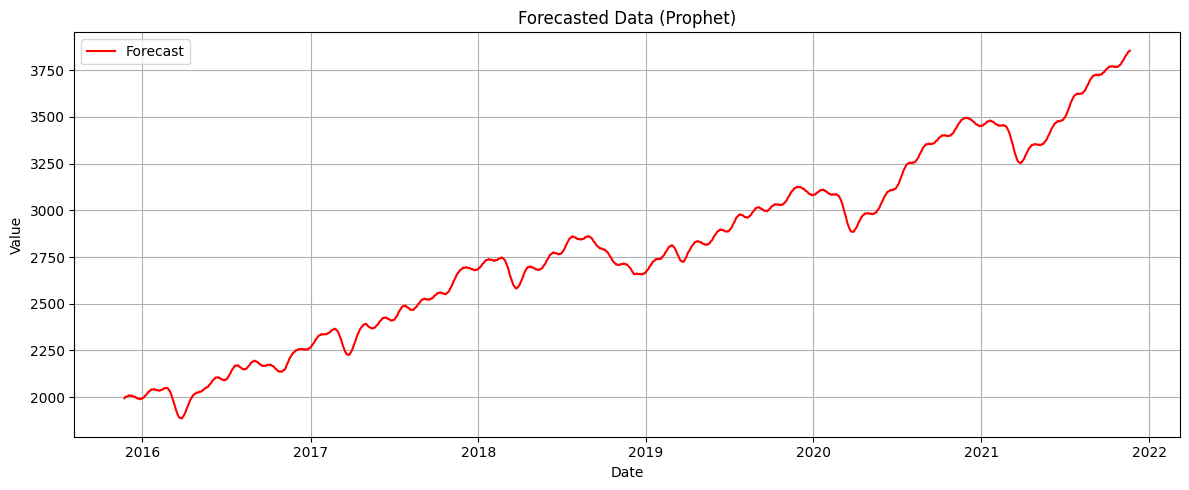

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['ds'], data['y'], label='Actual', color='blue')
plt.title('Actual Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.title('Forecasted Data (Prophet)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


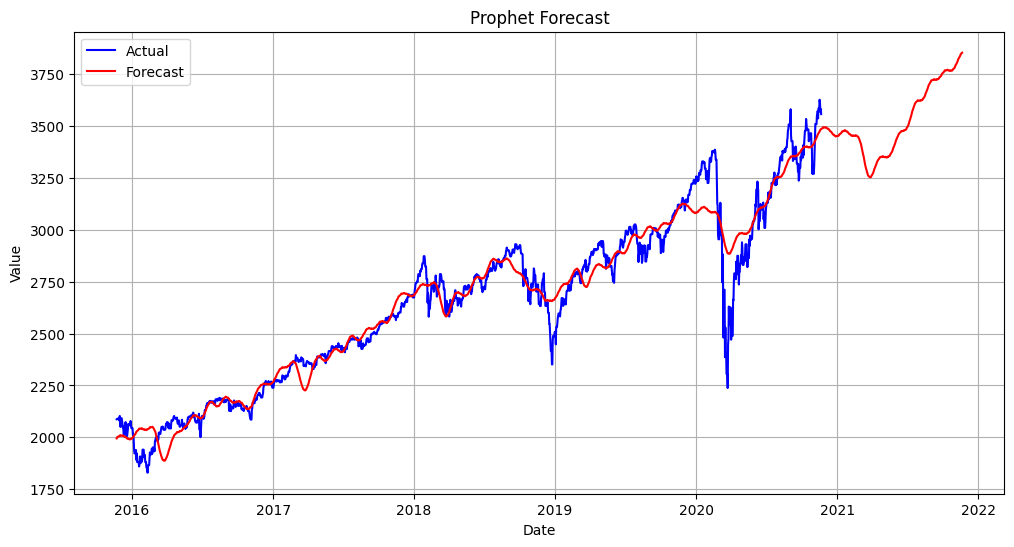

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['ds'], data['y'], label='Actual',color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast',color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(data.columns)

Index(['ds', 'y'], dtype='object')


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def adf_test(series):
    result = adfuller(series)
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is NOT stationary")

adf_test(data['y'])

ts_diff = data['y'].diff().dropna()

adf_test(ts_diff)

Critical Value (1%): -3.4339861159726306
Critical Value (5%): -2.863146142843122
Critical Value (10%): -2.5676250581282964
Series is NOT stationary
Critical Value (1%): -3.4339861159726306
Critical Value (5%): -2.863146142843122
Critical Value (10%): -2.5676250581282964
Series is stationary


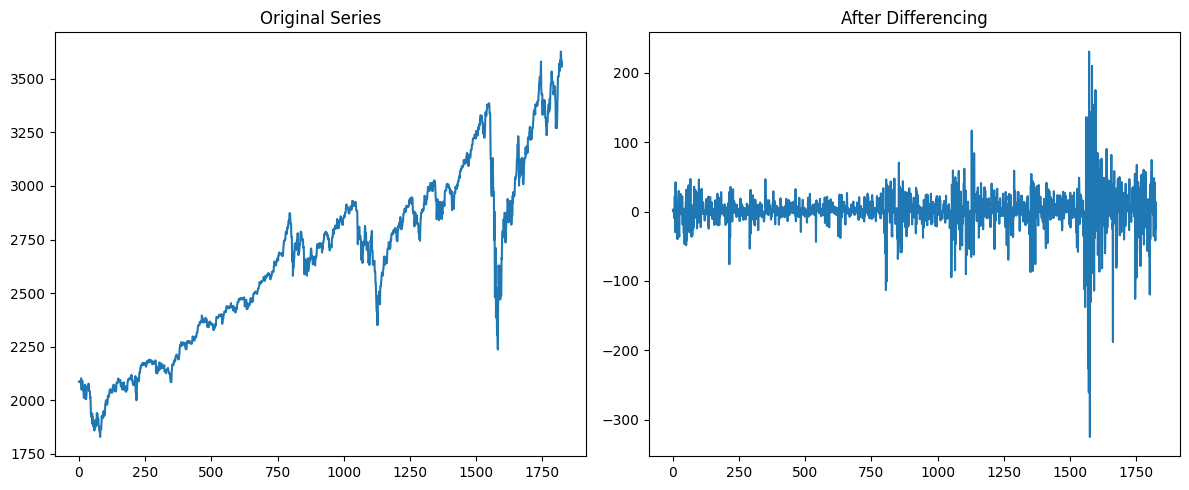

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(data['y'])
plt.title("Original Series")

plt.subplot(1, 2, 2)
plt.plot(ts_diff)
plt.title("After Differencing")
plt.tight_layout()
plt.show()

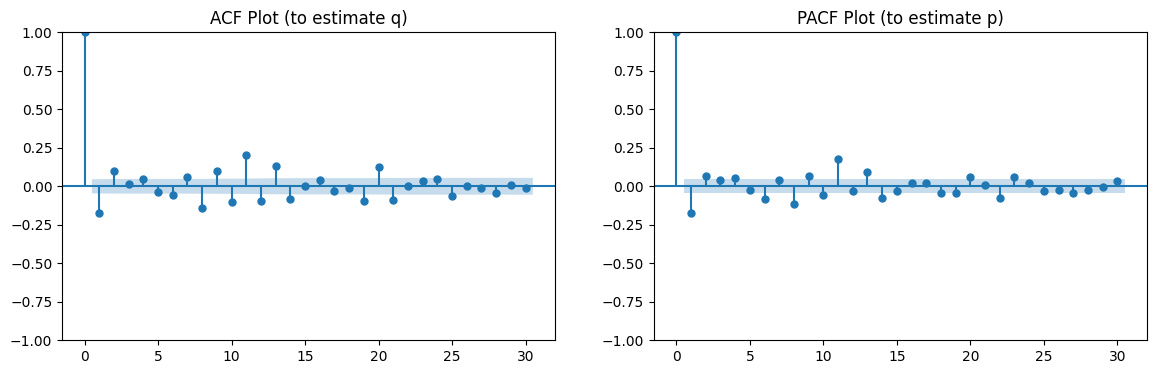

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(ts_diff, ax=axes[0], lags=30)
plot_pacf(ts_diff, ax=axes[1], lags=30, method='ywm')
axes[0].set_title("ACF Plot (to estimate q)")
axes[1].set_title("PACF Plot (to estimate p)")
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['y'], order=(5,1,12))
model_fit = model.fit()
future=model_fit.forecast(steps=365)
print(future.head())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1825    3552.443124
1826    3557.874847
1827    3549.787455
1828    3556.950266
1829    3557.242183
Name: predicted_mean, dtype: float64


In [ ]:
future_dates = pd.date_range(start=data['ds'].iloc[-1] + pd.Timedelta(days=1), periods=365)
future.index = future_dates

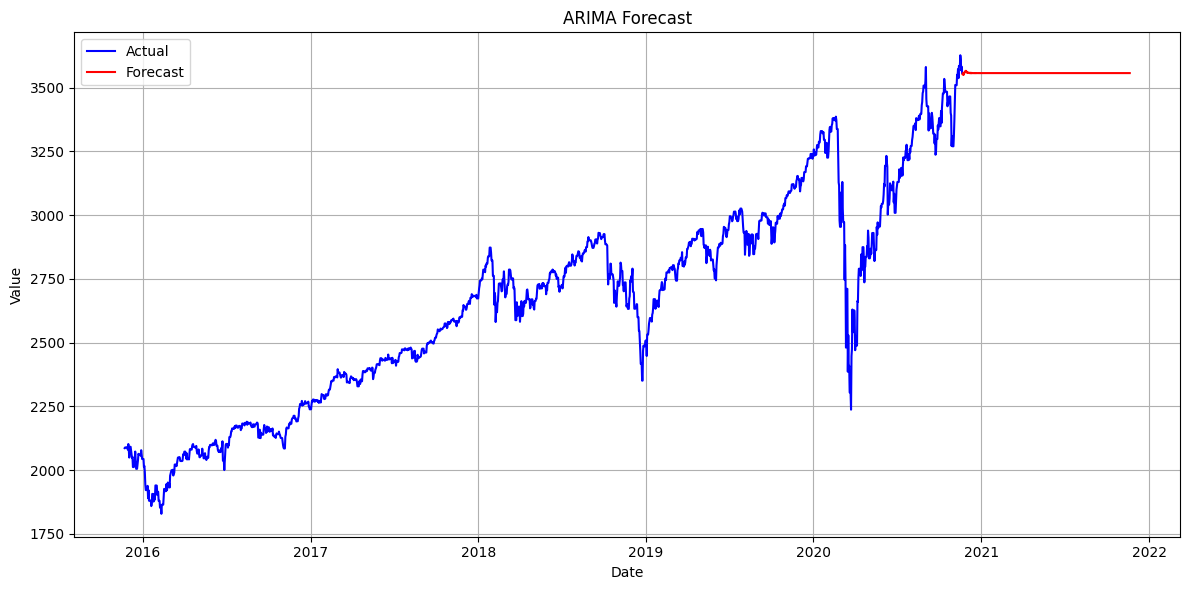

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['ds'], data['y'], label='Actual', color='blue')
plt.plot(future.index, future.values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Value')

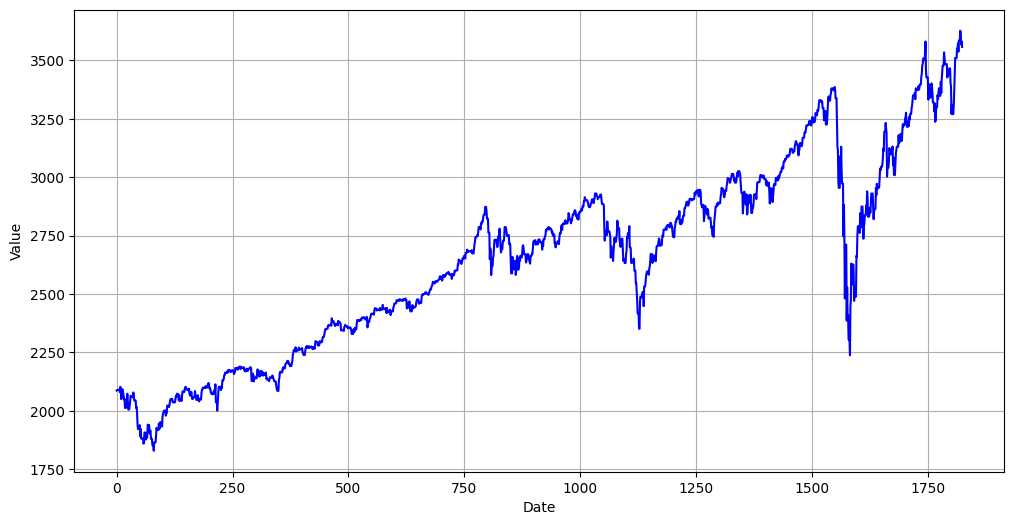

In [ ]:
plt.figure(figsize=(12, 6))

plt.grid(True)
plt.plot(data.index, data['y'], label='Actual', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')

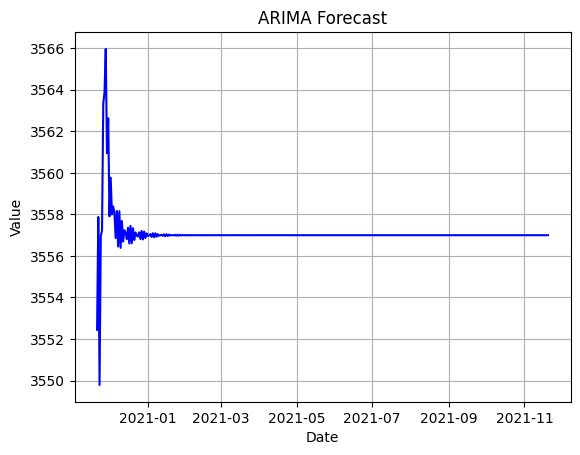

In [ ]:
plt.plot(future.index, future, label='Forecast', color='blue')

plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
data['ds'] = pd.to_datetime(data['ds'])
data.set_index('ds', inplace=True)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['y'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))

model_fit = model.fit()
fitted_values = model_fit.predict(start=data.index[0], end=data.index[-1])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
future = model_fit.forecast(steps=365)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=365)
future.index = future_dates

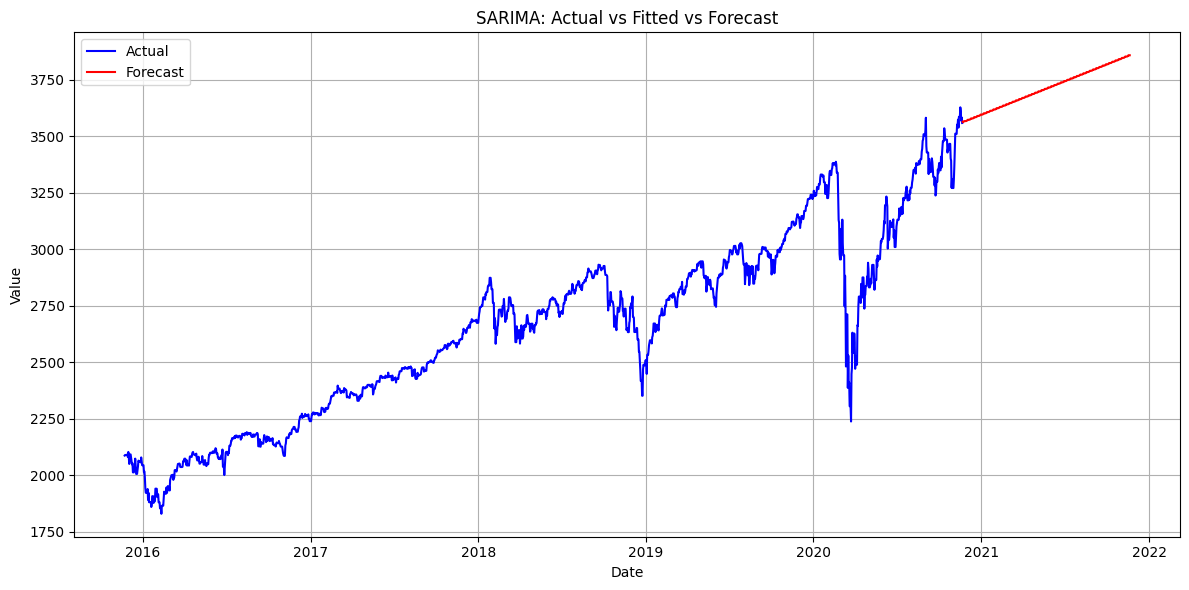

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['y'], label='Actual', color='blue')
#plt.plot(fitted_values.index, fitted_values, label='Fitted (SARIMA)', color='green')
plt.plot(future.index, future.values, label='Forecast', color='red')

plt.title('SARIMA: Actual vs Fitted vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(data.columns)
print(df.columns)

Index(['y'], dtype='object')
Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler


values = data['y'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(seq_len, len(data)):
         x = data[i-seq_len:i]
         y = data[i]
         xs.append(x)
         ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 30
X, y = create_sequences(scaled_values, sequence_length)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


X_train_tensor = torch.from_numpy(X_train).float().view(-1, sequence_length, 1)
y_train_tensor = torch.from_numpy(y_train).float().view(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float().view(-1, sequence_length, 1)
y_test_tensor = torch.from_numpy(y_test).float().view(-1, 1)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")


Epoch 2/100, Loss: 0.226335
Epoch 4/100, Loss: 0.181454
Epoch 6/100, Loss: 0.138154
Epoch 8/100, Loss: 0.096784
Epoch 10/100, Loss: 0.060877
Epoch 12/100, Loss: 0.042219
Epoch 14/100, Loss: 0.057315
Epoch 16/100, Loss: 0.060513
Epoch 18/100, Loss: 0.046669
Epoch 20/100, Loss: 0.039268
Epoch 22/100, Loss: 0.039118
Epoch 24/100, Loss: 0.040867
Epoch 26/100, Loss: 0.041309
Epoch 28/100, Loss: 0.039559
Epoch 30/100, Loss: 0.036122
Epoch 32/100, Loss: 0.032290
Epoch 34/100, Loss: 0.029609
Epoch 36/100, Loss: 0.028681
Epoch 38/100, Loss: 0.027639
Epoch 40/100, Loss: 0.024196
Epoch 42/100, Loss: 0.019736
Epoch 44/100, Loss: 0.016280
Epoch 46/100, Loss: 0.012674
Epoch 48/100, Loss: 0.007644
Epoch 50/100, Loss: 0.006679
Epoch 52/100, Loss: 0.004036
Epoch 54/100, Loss: 0.006126
Epoch 56/100, Loss: 0.005192
Epoch 58/100, Loss: 0.004963
Epoch 60/100, Loss: 0.003885
Epoch 62/100, Loss: 0.002941
Epoch 64/100, Loss: 0.002671
Epoch 66/100, Loss: 0.002657
Epoch 68/100, Loss: 0.002469
Epoch 70/100, Loss

In [ ]:
model.eval()
train_pred = model(X_train_tensor).detach().numpy()
test_pred = model(X_test_tensor).detach().numpy()

train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv = scaler.inverse_transform(test_pred)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error
train_rmse_lstm = np.sqrt(mean_squared_error(y_train_inv, train_pred_inv))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, test_pred_inv))
print(f"LSTM Train RMSE: {train_rmse_lstm:.2f}")
print(f"LSTM Test RMSE: {test_rmse_lstm:.2f}")

LSTM Train RMSE: 40.51
LSTM Test RMSE: 101.29


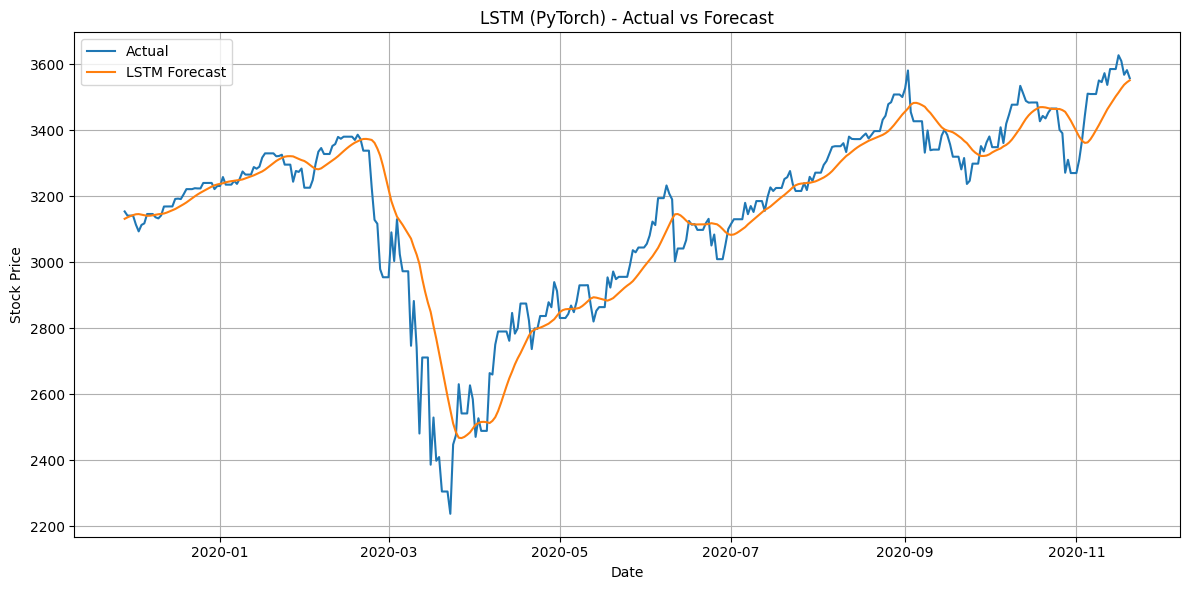

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.plot(data.index[-len(test_pred_inv):], test_pred_inv, label='LSTM Forecast')
plt.title('LSTM (PyTorch) - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(data.columns)
print(df.columns)
model_arima = ARIMA(data['y'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=len(y_test))
rmse_arima = np.sqrt(mean_squared_error(data['y'][-len(y_test):], forecast_arima))
print(f"ARIMA RMSE: {rmse_arima:.2f}")

Index(['y'], dtype='object')
Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 480.06


In [ ]:
model_sarima = SARIMAX(data['y'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(len(y_test))
rmse_sarima = np.sqrt(mean_squared_error(data['y'][-len(y_test):], forecast_sarima))
print(f"SARIMA RMSE: {rmse_sarima:.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA RMSE: 1652.48


In [ ]:
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df)
future = model_prophet.make_future_dataframe(periods=len(y_test))
forecast_prophet = model_prophet.predict(future)
rmse_prophet = np.sqrt(mean_squared_error(data['y'][-len(y_test):], forecast_prophet['yhat'][-len(y_test):]))
print(f"Prophet RMSE: {rmse_prophet:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvllqb2pw/y531sv1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvllqb2pw/1v6xovgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35143', 'data', 'file=/tmp/tmpvllqb2pw/y531sv1f.json', 'init=/tmp/tmpvllqb2pw/1v6xovgs.json', 'output', 'file=/tmp/tmpvllqb2pw/prophet_model64zsfrdb/prophet_model-20250727130420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 396.65
